# Visualizing Joern Graphs

In [10]:
import pandas as pd

In [11]:
ilp_data = pd.read_csv("../data/ilp_dataset.csv.gz")
ilp_data = ilp_data.drop('Unnamed: 0', axis='columns')

In [12]:
ilp_data

,testcase_ID,filename,code,flaw,flaw_loc,bug,code_length
0,62804,000/062/804/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,False,1722
1,62852,000/062/852/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,False,1674
2,62869,000/062/869/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,32,False,1760
3,62900,000/062/900/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,False,1680
4,232012,000/232/012/CWE122_Heap_Based_Buffer_Overflow_...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-122,31,False,1723
5,-62804,000/062/804/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,True,1618
6,-62852,000/062/852/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,True,1570
7,-62869,000/062/869/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,32,True,1616
8,-62900,000/062/900/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,True,1576
9,-232012,000/232/012/CWE122_Heap_Based_Buffer_Overflow_...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-122,31,True,1619


Now do it for all our examples:

In [13]:
import os
import subprocess
import tempfile

In [17]:
testcase_IDs = []
flaws = []
bugs = []
code_lengths = []
trees = []

In [18]:
def generate_dot(testcase):
    tmp_dir = tempfile.TemporaryDirectory()

    for file in testcase.itertuples():
        short_filename = file.filename.split("/")[-1]
        with open(tmp_dir.name + "/" + short_filename, 'w') as f:
            f.write(file.code)

    subprocess.check_call(["/joern/joern-parse", "--out", tmp_dir.name + "/cpg.bin.zip", tmp_dir.name])

    tree = subprocess.check_output(
        "cd /joern && /joern/joern-query --cpg "+tmp_dir.name + "/cpg.bin.zip -f /project/code/joern_cfg_to_dot.scala",
        shell=True,
        universal_newlines=True,
    )

    testcase_IDs.append(file.testcase_ID)
    flaws.append(file.flaw)
    bugs.append(file.bug)
    code_lengths.append(file.code_length)
    trees.append(tree)

    tmp_dir.cleanup()

In [19]:
ilp_data.groupby('testcase_ID').apply(generate_dot)

""


In [20]:
dot = pd.DataFrame({
    'testcase_ID': testcase_IDs,
    'flaw': flaws,
    'bug': bugs,
    'code_length': code_lengths,
    'dot': trees,
})
dot = dot[1:11]  # when we run apply it duplicates the first group
dot

,testcase_ID,flaw,bug,code_length,dot
1,-232012,CWE-122,True,1619,"digraph g {\n# AST\n{\n edge[color=green3,con..."
2,-62900,CWE-121,True,1576,"digraph g {\n# AST\n{\n edge[color=green3,con..."
3,-62869,CWE-121,True,1616,"digraph g {\n# AST\n{\n edge[color=green3,con..."
4,-62852,CWE-121,True,1570,"digraph g {\n# AST\n{\n edge[color=green3,con..."
5,-62804,CWE-121,True,1618,"digraph g {\n# AST\n{\n edge[color=green3,con..."
6,62804,CWE-121,False,1722,"digraph g {\n# AST\n{\n edge[color=green3,con..."
7,62852,CWE-121,False,1674,"digraph g {\n# AST\n{\n edge[color=green3,con..."
8,62869,CWE-121,False,1760,"digraph g {\n# AST\n{\n edge[color=green3,con..."
9,62900,CWE-121,False,1680,"digraph g {\n# AST\n{\n edge[color=green3,con..."
10,232012,CWE-122,False,1723,"digraph g {\n# AST\n{\n edge[color=green3,con..."


In [21]:
dot.to_csv("../data/ilp_data_as_dot.csv.gz")

Generate a PNG from one example using the `dot` program.

In [22]:
dot = pd.read_csv("../data/ilp_data_as_dot.csv.gz")

In [23]:
print(dot['dot'][1])

digraph g {
# AST
{
  edge[color=green3,constraint=true]
  149 -> 64 
   149 -> 56 
   149 -> 55 
   149 -> 37 
   149 -> 36 
   149 -> 35 
   149 -> 31 
   149 -> 28 
   149 -> 23 
   149 -> 20 
   149 -> 19 
   149 -> 75 
   149 -> 74 
   149 -> 73 
   149 -> 72 
   149 -> 71 
   149 -> 70 
   149 -> 69 
   103 -> 2 
   103 -> 17 
   64 -> 11 
   37 -> 13 
   23 -> 1 
   20 -> 12 
   19 -> 0 
   31 -> 3 
   56 -> 9 
   31 -> 10 
   55 -> 14 
   23 -> 6 
   28 -> 5 
   37 -> 18 
   35 -> 15 
   36 -> 8 
   19 -> 4 
   19 -> 16 
   55 -> 7 
   31 -> 54 
   31 -> 67 
   31 -> 52 
   31 -> 48 
   56 -> 65 
   56 -> 53 
   56 -> 50 
   19 -> 60 
   19 -> 38 
   19 -> 22 
   19 -> 29 
   19 -> 57 
   37 -> 27 
   37 -> 32 
   37 -> 40 
   37 -> 62 
   28 -> 68 
   28 -> 49 
   28 -> 43 
   64 -> 26 
   64 -> 41 
   64 -> 63 
   23 -> 47 
   23 -> 25 
   23 -> 61 
   23 -> 45 
   36 -> 30 
   36 -> 51 
   36 -> 33 
   55 -> 58 
   55 -> 24 
   55 -> 46 
   55 -> 21 
   20 -> 39 
   20 -> 44

In [24]:
tmp_dir = tempfile.TemporaryDirectory()

with open(tmp_dir.name + "/example.dot", 'w') as f:
    f.write(dot['dot'][1])
    
subprocess.check_call([
    "dot", "-O", "-Tpng", tmp_dir.name + "/example.dot"])
subprocess.check_call([
    "dot", "-O", "-Tsvg", tmp_dir.name + "/example.dot"])

0

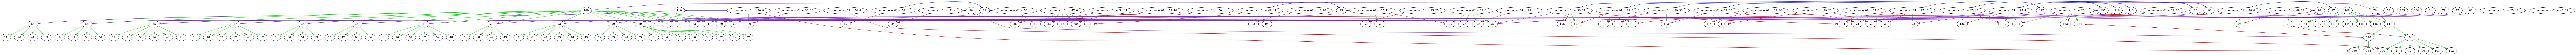

In [25]:
from IPython.display import Image
Image(filename=tmp_dir.name + "/example.dot.png")

In [58]:
tmp_dir.name + "/example.dot.svg"

'/tmp/tmpbpe08am8/example.dot.svg'

In [60]:
dot['testcase_ID'][1]

-232012

In [61]:
!cp '/tmp/tmpbpe08am8/example.dot.svg' '../data/testcase_-232012_cfg_graph.svg'

In [28]:
print(ilp_data[ilp_data['testcase_ID'] == -232012].iloc[0].code)

/* TEMPLATE GENERATED TESTCASE FILE
Filename: CWE122_Heap_Based_Buffer_Overflow__CWE131_memcpy_01.c
Label Definition File: CWE122_Heap_Based_Buffer_Overflow__CWE131.label.xml
Template File: sources-sink-01.tmpl.c
*/
/*
 * @description
 * CWE: 122 Heap Based Buffer Overflow
 * BadSource:  Allocate memory without using sizeof(int)
 * GoodSource: Allocate memory using sizeof(int)
 * Sink: memcpy
 *    BadSink : Copy array to data using memcpy()
 * Flow Variant: 01 Baseline
 *
 * */

#include "std_testcase.h"

#ifndef OMITBAD

void CWE122_Heap_Based_Buffer_Overflow__CWE131_memcpy_01_bad()
{
    int * data;
    data = NULL;
    /* FLAW: Allocate memory without using sizeof(int) */
    data = (int *)malloc(10);
    if (data == NULL) {exit(-1);}
    {
        int source[10] = {0};
        /* POTENTIAL FLAW: Possible buffer overflow if data was not allocated correctly in the source */
        memcpy(data, source, 10*sizeof(int));
        printIntLine(data[0]);
        free(data);
    }
}

#end